<h2> Imports

In [81]:
#in the following code, a Gaussian Naive Bayes Classifier will be build to predict whether a person makes over 50K a year

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), Python data analysis library
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization; to explore the purpose and target column

# Machine Learning and data analysis

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

<h2> Loading the dataset

In [82]:
#import dataset as ds
#path = 'C:/Users/evafi/bayes_xml/dataset/adult_income_dataset.csv'
path = '/Users/fabian/Desktop/datasets/adult.csv'
data = pd.read_csv(path, sep=",")
data2 = data

#top 5 of each column
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<h2> Analyze the dataset

In [83]:
# shape dataset
#numer of rows and columns/ features
data.shape

(48842, 15)

In [84]:
#data analysis
n_records = data.shape[0]
n_greater_50k = data[data['income'] == '>50K'].shape[0]
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total numbber of records: {}".format(n_records))
print("Individuals making more than $50.000: {}".format(n_greater_50k))
print("Individuals making at most $50.000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50.000: {}%".format(greater_percent))

Total numbber of records: 48842
Individuals making more than $50.000: 11687
Individuals making at most $50.000: 37155
Percentage of individuals making more than $50.000: 23.928176569346054%


In [85]:
#rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data.columns = col_names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [86]:
# general inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [87]:
#Overview of the data
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h2>Preprocessing the data

<h4> Check values in each variable and replace them / Dealing with missing values

In [88]:
#check "?" in dataset

col_n = data.columns
num_data = data.shape[0]
for c in col_n:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print(c)
        print(num_non)
        print("{0:.2f}%".format(float(num_non) / num_data * 100))

workclass
2799
5.73%
occupation
2809
5.75%
native_country
857
1.75%


In [89]:
# replace '?' values in workclass variable with `NaN`
data['workclass'].replace('?', np.NaN, inplace=True)

# replace '?' values in occupation variable with `NaN`
data['occupation'].replace('?', np.NaN, inplace=True)

# replace '?' values in native_country variable with `NaN`
data['native_country'].replace('?', np.NaN, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = data['workclass'].mode()[0]
data['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = data['occupation'].mode()[0]
data['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = data['native_country'].mode()[0]
data['native_country'].fillna(mode_native_country, inplace=True)

In [90]:
# Check for missing values again
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [91]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [92]:
# check missing values in categorical variables

data[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [93]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(data[var].value_counts())

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         

<h4> Normalization

tbd.

In [94]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  8  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  41  labels
income  contains  2  labels


In [95]:
# get numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [96]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric)

In [97]:
# Drop unnecessary columns
data.drop(['fnlwgt'], axis=1, inplace=True)

In [98]:
corrmat = data2.corr()
print(corrmat)

ValueError: could not convert string to float: 'Private'

In [ ]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [ ]:
# Visualize the distribution of income
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

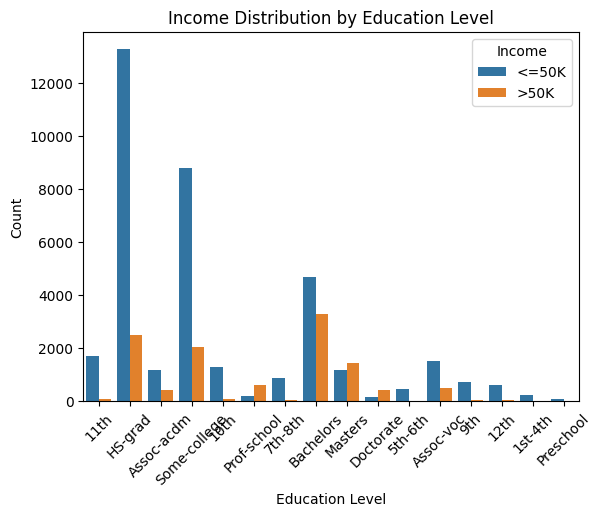

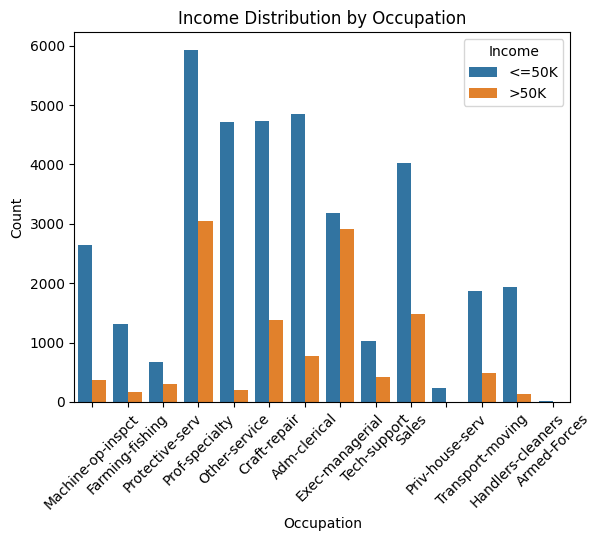

In [ ]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=data)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

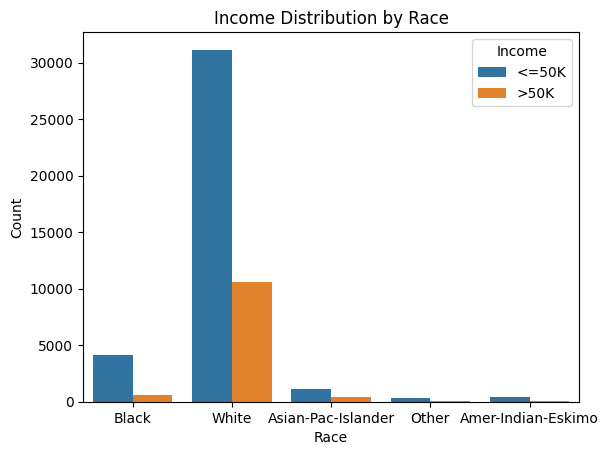

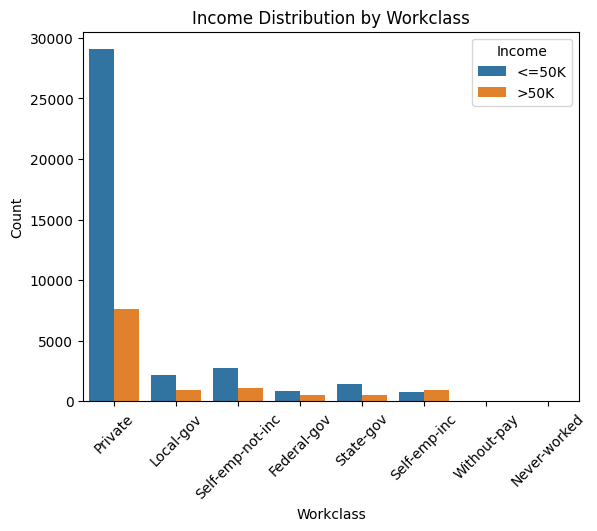

In [ ]:
# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

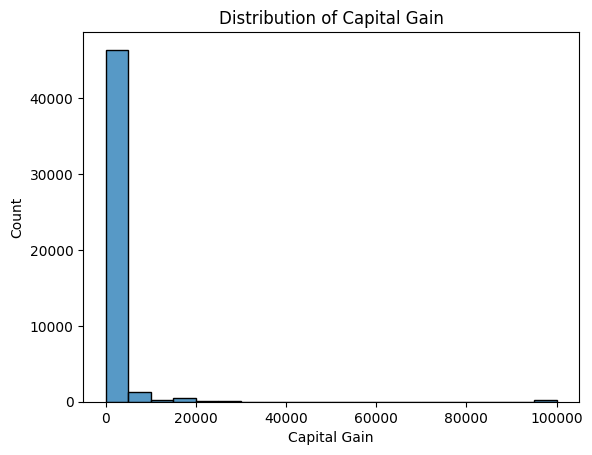

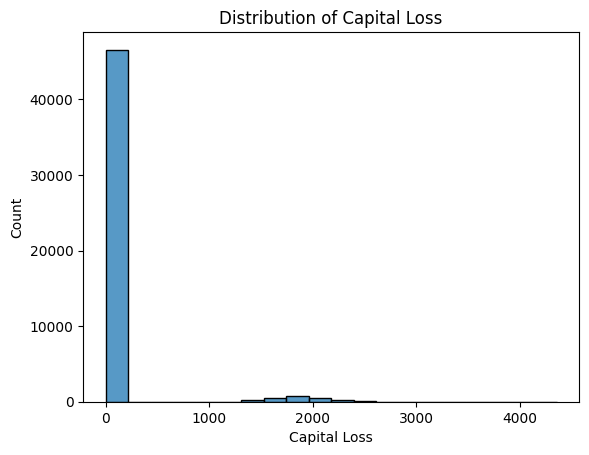

In [ ]:
# Visualize the distribution of capital-gain
sns.histplot(data['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss
sns.histplot(data['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [ ]:
# Log-transform the skewed features
skewed = ['capital_gain', 'capital_loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

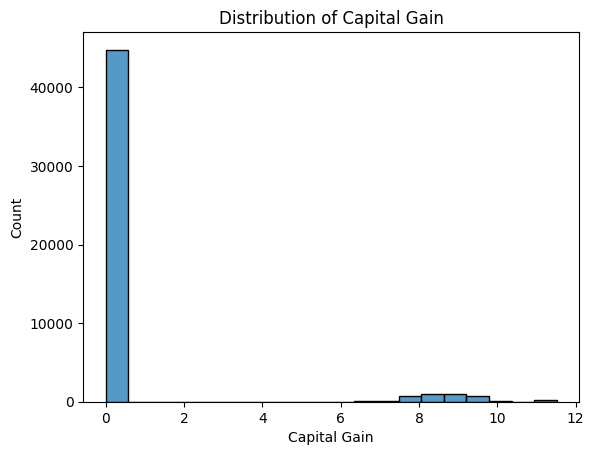

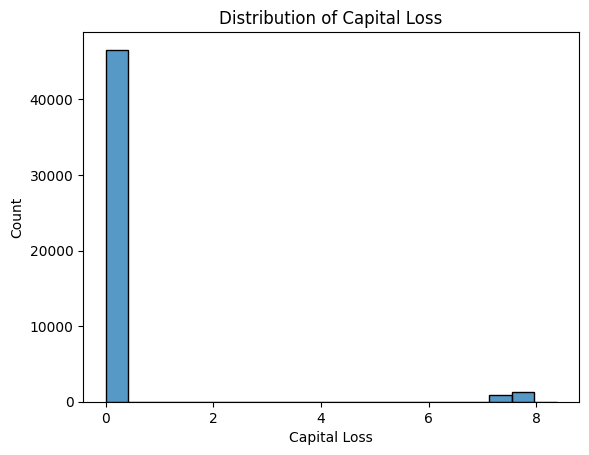

In [ ]:
# Visualize the distribution of capital-gain after transformation
sns.histplot(features_log_transformed['capital_gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss after transformation
sns.histplot(features_log_transformed['capital_loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

features_log_minmax_transform = pd.DataFrame(data)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])
# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,Private,Some-college,0.600000,Never-married,Prof-specialty,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


In [ ]:
#preprocessing categorial features

features_log_minmax_transform.head(1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,11th,0.4,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States,<=50K


In [ ]:
# Transform Categorial into Numerical
# One-hot encode the 'features_log_minmax_transform' data 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
print (encoded)

106 total features after one-hot encoding.
['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'oc

<h4> Feature Selection

tbd.

<h2>Building the Model

<h4>Declare feature vector and target variable

In [ ]:
X = data.drop(['income'], axis=1)

y = data['income']

<h4> Split data into separate training and test set 

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((34189, 13), (14653, 13))

In [ ]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

KeyError: "['income'] not in index"

In [ ]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05721138377840826
occupation 0.05735762964696247
native_country 0.017608002573927285


KeyError: 'income'

In [ ]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True) 

tbd.

<h4> Feature Scaling

tbd.

<h2> Model training

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

ValueError: could not convert string to float: 'Local-gov'

<h2>Predictions and Evaluations

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

ValueError: could not convert string to float: 'Private'

rest tbd. 